In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("DS3_C1_S4_SuperstoreSales_Data_Challenge.csv",parse_dates=['Order Date'])
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


In [3]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       2121 non-null   int64         
 1   Order ID     2121 non-null   object        
 2   Order Date   2121 non-null   datetime64[ns]
 3   Ship Date    2121 non-null   object        
 4   Ship Mode    2121 non-null   object        
 5   Segment      2121 non-null   object        
 6   Country      2121 non-null   object        
 7   City         2121 non-null   object        
 8   State        2121 non-null   object        
 9   Postal Code  2121 non-null   int64         
 10  Region       2121 non-null   object        
 11  Category     2121 non-null   object        
 12  Sales        2121 non-null   float64       
 13  Quantity     2121 non-null   int64         
 14  Discount     2121 non-null   float64       
 15  Profit       2121 non-null   float64       
dtypes: dat

In [4]:
data = data.set_index('Order Date')

In [5]:
furniture_data = data.resample('M').mean()
furniture_data.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,4433.300000,53017.650000,312.126250,3.500000,0.135000,40.273325
2014-02-28,6353.285714,66296.571429,262.808286,3.285714,0.114286,17.241671
2014-03-31,5835.939394,58027.666667,441.635030,3.969697,0.230303,-34.201667
2014-04-30,4829.115385,65488.730769,305.570654,3.115385,0.132692,21.322312
2014-05-31,4806.750000,57519.791667,288.032792,4.041667,0.256250,-14.578233


In [6]:
sales_data = furniture_data['Sales']
sales_data.head()

Order Date
2014-01-31    312.126250
2014-02-28    262.808286
2014-03-31    441.635030
2014-04-30    305.570654
2014-05-31    288.032792
Freq: M, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Order Date'>

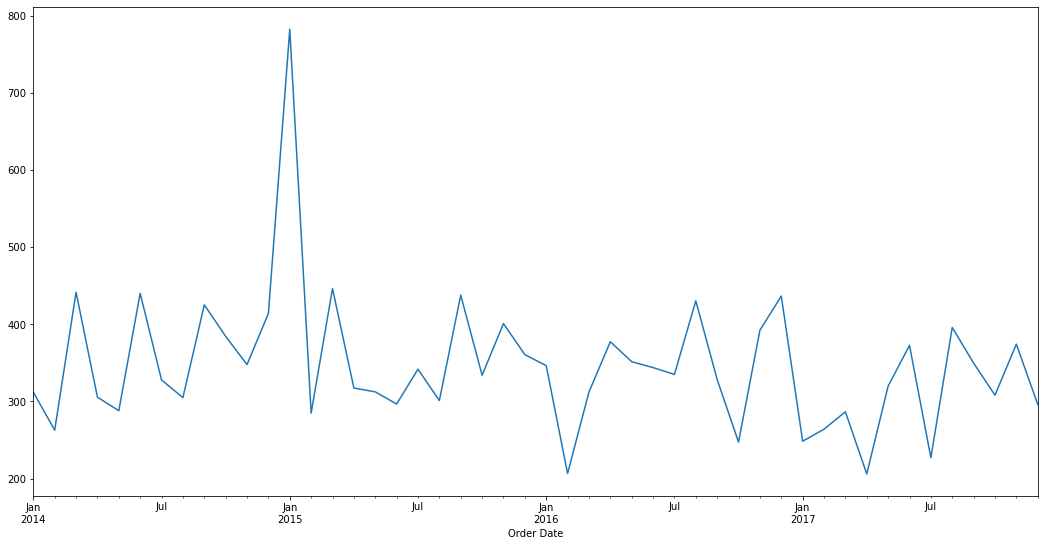

In [7]:
sales_data.plot(figsize=(18,9))

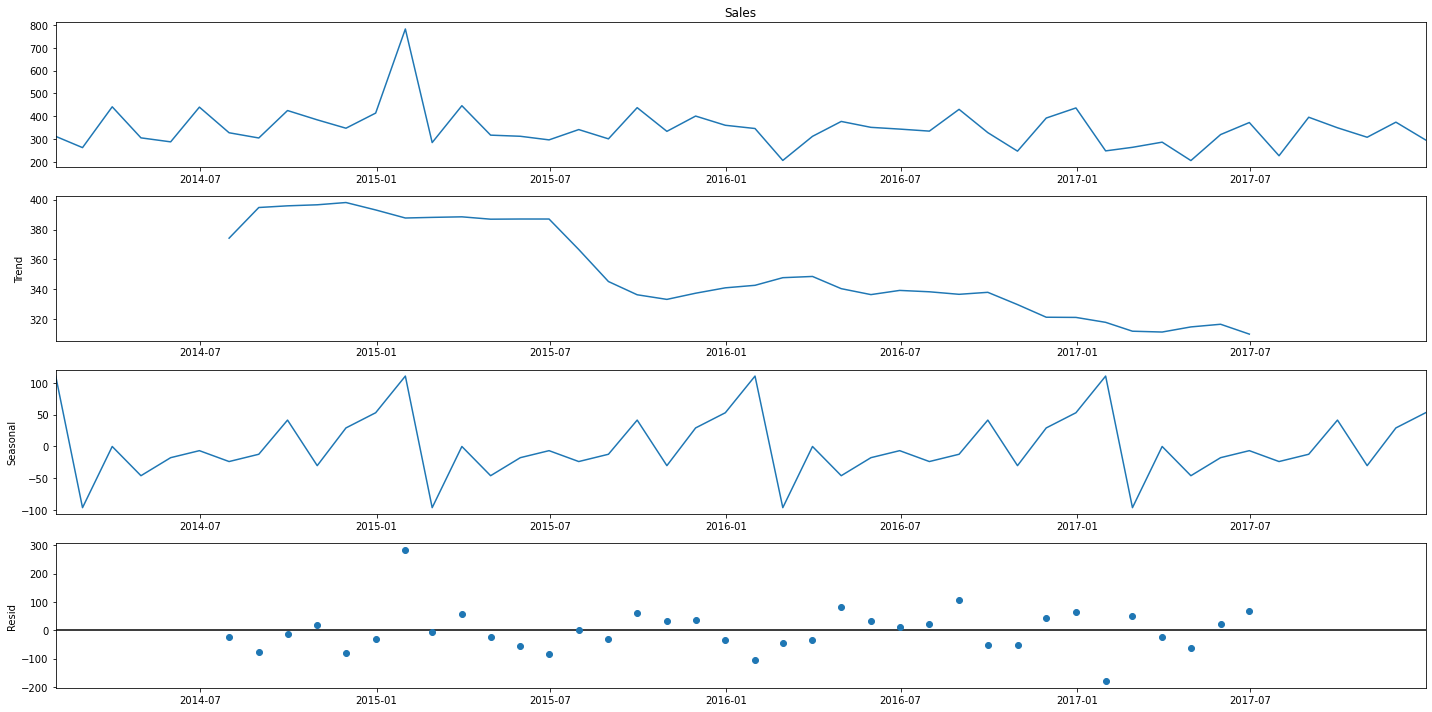

In [8]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(furniture_data.Sales, period=12,model='additive')
fig = decomposition.plot()
plt.show()

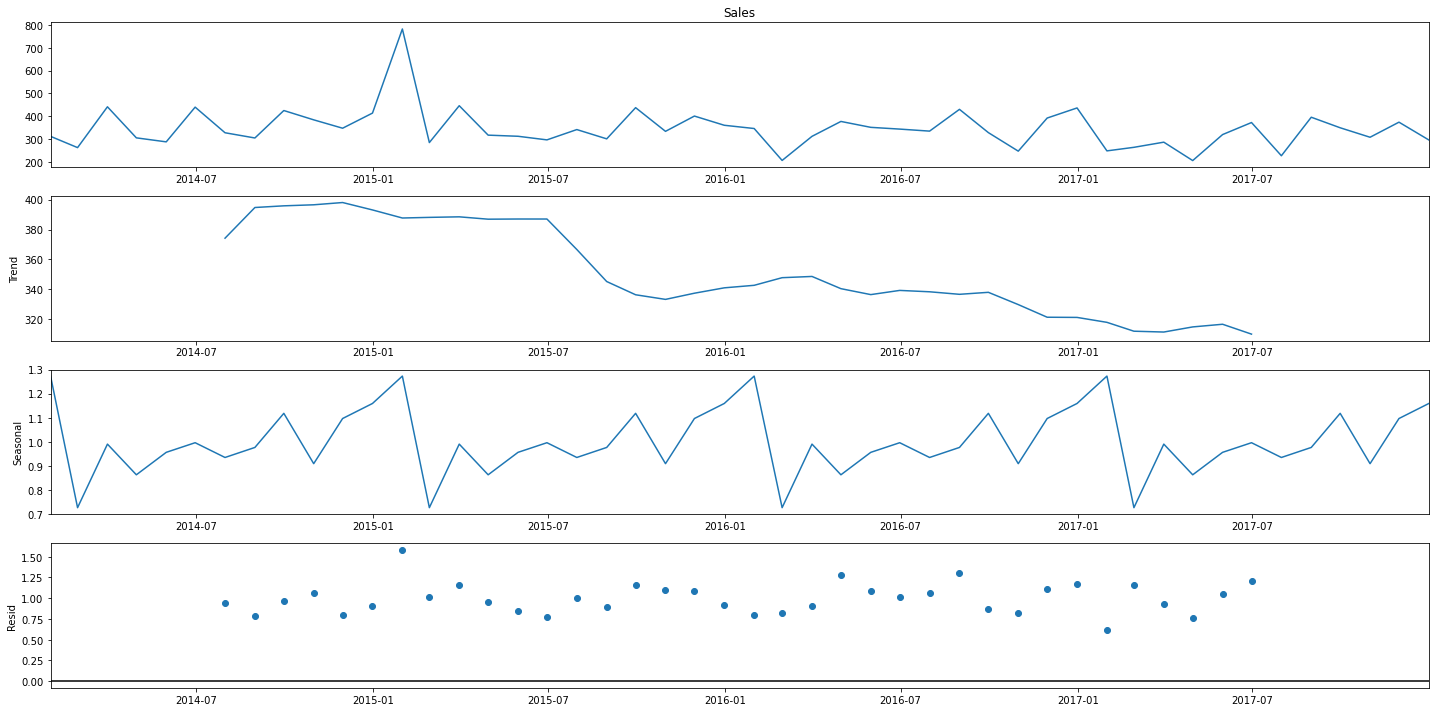

In [9]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(furniture_data.Sales, period=12,model='multiplicative')
fig = decomposition.plot()
plt.show()

In [10]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [11]:
checkStationarity(sales_data)

'pvalue=9.093398510006677e-10. Data is Stationary. Proceed to model building'

In [12]:
train_df = sales_data.iloc[:int(0.7 * len(sales_data))]
test_df = sales_data.iloc[int(0.7 * len(sales_data)):]

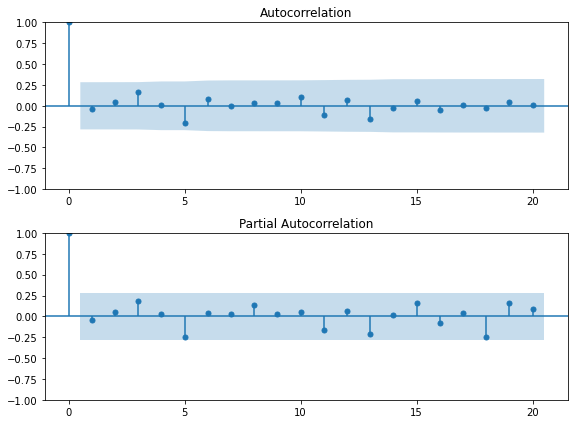

In [13]:
fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(furniture_data.Sales, lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(furniture_data.Sales, lags=20, ax=ax2)

plt.tight_layout()

In [14]:
p=1;d=0;q=1; season_order=12
model = SARIMAX(sales_data, order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -286.988
Date:                            Mon, 26 Dec 2022   AIC                            583.977
Time:                                    17:06:50   BIC                            593.333
Sample:                                01-31-2014   HQIC                           587.512
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.059     16.961      0.000       0.884       1.115
ma.L1         -0.9288      0.255     -3.637      0.000      -1.429      -0.428
ar.S.L12       0.9891      2.315      0.427      0.669      -3.549       5.527
ma.S.L12      -0.9668      3.928     -0.246      0.806      -8.665       6.732
sigma2      8141.3210   1.21e+04      0.673      0.501   -1.56e+04    3.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               144.59
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.96
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
predictions = model.predict(start=39,end=48,dynamic=True)

In [17]:
predictions

2017-04-30    335.197352
2017-05-31    333.222306
2017-06-30    338.291184
2017-07-31    335.259364
2017-08-31    336.572331
2017-09-30    342.663077
2017-10-31    333.543905
2017-11-30    340.657403
2017-12-31    343.446260
2018-01-31    347.621369
Freq: M, Name: predicted_mean, dtype: float64

In [18]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test_df[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
df_res

,actual,predicted,err
0,247.345354,335.197352,-87.851997
1,392.390479,333.222306,59.168173
2,436.651369,338.291184,98.360186
3,248.501333,335.259364,-86.758031
4,264.089900,336.572331,-72.482431
5,286.669600,342.663077,-55.993477
6,206.044502,333.543905,-127.499403
7,319.953928,340.657403,-20.703474
8,372.717386,343.446260,29.271126
9,227.173500,347.621369,-120.447869


In [19]:
# MSE
mean_squared_error(df_res.actual,df_res.predicted)

6885.871973340569

<AxesSubplot:>

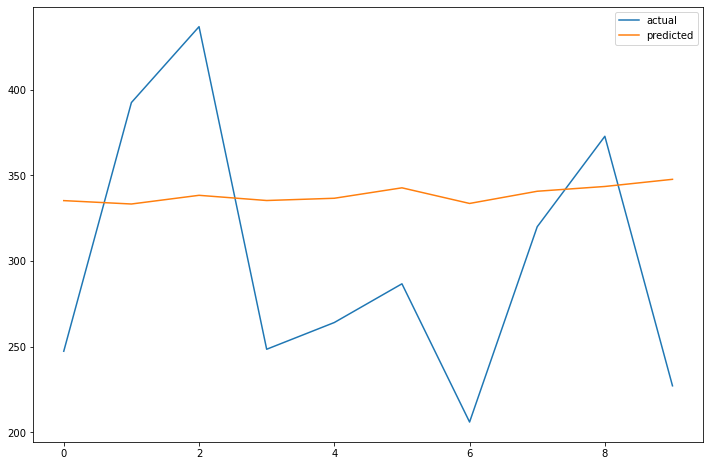

In [20]:
df_res[['actual','predicted']].plot(figsize=(12,8))

In [21]:
m2 = SARIMAX(sales_data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
forecast = m2.predict(start=len(sales_data), end=len(sales_data)+20).rename('Forecast')
forecast

2018-01-31    339.328264
2018-02-28    313.658572
2018-03-31    331.524848
2018-04-30    320.819735
2018-05-31    323.423723
2018-06-30    330.321444
2018-07-31    321.748599
2018-08-31    329.627068
2018-09-30    333.614880
2018-10-31    323.338515
2018-11-30    332.700742
2018-12-31    332.304919
2019-01-31    337.982284
2019-02-28    312.589272
2019-03-31    330.259339
2019-04-30    319.668363
2019-05-31    322.241926
2019-06-30    329.062585
2019-07-31    320.580722
2019-08-31    328.371480
2019-09-30    332.313844
Freq: M, Name: Forecast, dtype: float64

<AxesSubplot:xlabel='Order Date'>

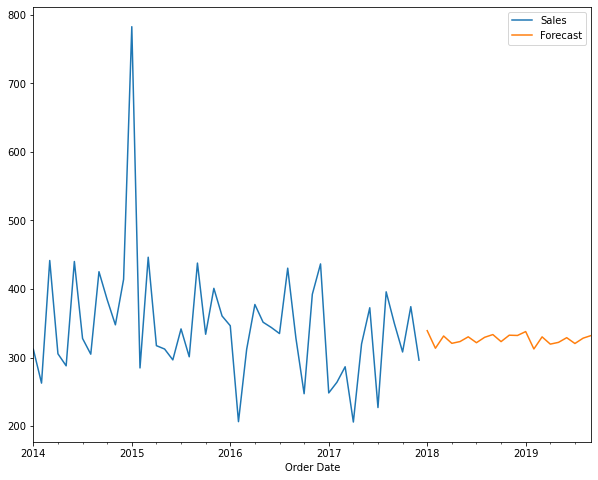

In [22]:
sales_data.plot(figsize=(10,8),legend=True)
forecast.plot(legend=True)